In [ ]:
!pip install kaggle

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
! kaggle datasets download vijaykumar1799/face-mask-detection

100% 222M/222M [00:11<00:00, 22.8MB/s]
100% 222M/222M [00:11<00:00, 20.4MB/s]


In [ ]:
!unzip /content/face-mask-detection.zip

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import cv2
import shutil

# importing the neccesary libraries

import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory, sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from glob import glob
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
'''Here we transfere the images and the json files in one folder to ease the access to them.
Also, we took a part only from the data due to lack of computational power that kaggle and colab provides.'''

try:
  os.makedirs("/content/train/mask_weared_incorrect")
  os.makedirs("/content/train/with_mask")
  os.makedirs("/content/train/without_mask")

  os.makedirs("/content/val/mask_weared_incorrect")
  os.makedirs("/content/val/with_mask")
  os.makedirs("/content/val/without_mask")

except OSError as error:
    print(error)

In [ ]:
count=0
origin = '/content/Dataset/mask_weared_incorrect/'
target = '/content/train/mask_weared_incorrect/'
target1 = '/content/val/mask_weared_incorrect/'

files = os.listdir(origin)
# Fetching all the files to directory
for file_name in files:
    if count<=2000:
        count+=1
        shutil.copy(origin+file_name, target+file_name)
    elif count>2000:
        count+=1
        shutil.copy(origin+file_name, target1+file_name)

In [ ]:
count=0
origin = '/content/Dataset/with_mask/'
target = '/content/train/with_mask/'
target1 = '/content/val/with_mask/'

files = os.listdir(origin)
# Fetching all the files to directory
for file_name in files:
    if count<=2000:
        count+=1
        shutil.copy(origin+file_name, target+file_name)
    elif count>2000:
        count+=1
        shutil.copy(origin+file_name, target1+file_name)

In [ ]:
count=0
origin = '/content/Dataset/without_mask/'
target = '/content/train/without_mask/'
target1 = '/content/val/without_mask/'


files = os.listdir(origin)
# Fetching all the files to directory
for file_name in files:
    if count<=2000:
        count+=1
        shutil.copy(origin+file_name, target+file_name)
    elif count>2000:
        count+=1
        shutil.copy(origin+file_name, target1+file_name)

In [ ]:
data_dir = '/content/Dataset'

In [ ]:
#Size of the batches of data
BATCH_SIZE = 32
#Size to resize images
IMG_SIZE = (160, 160)

In [ ]:
# Loading the data into training subset
train_dir = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

# loading the data into validation subset
validation_dir = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 8982 files belonging to 3 classes.
Using 7186 files for training.
Found 8982 files belonging to 3 classes.
Using 1796 files for validation.


### Show the first nine images and labels from the training set:

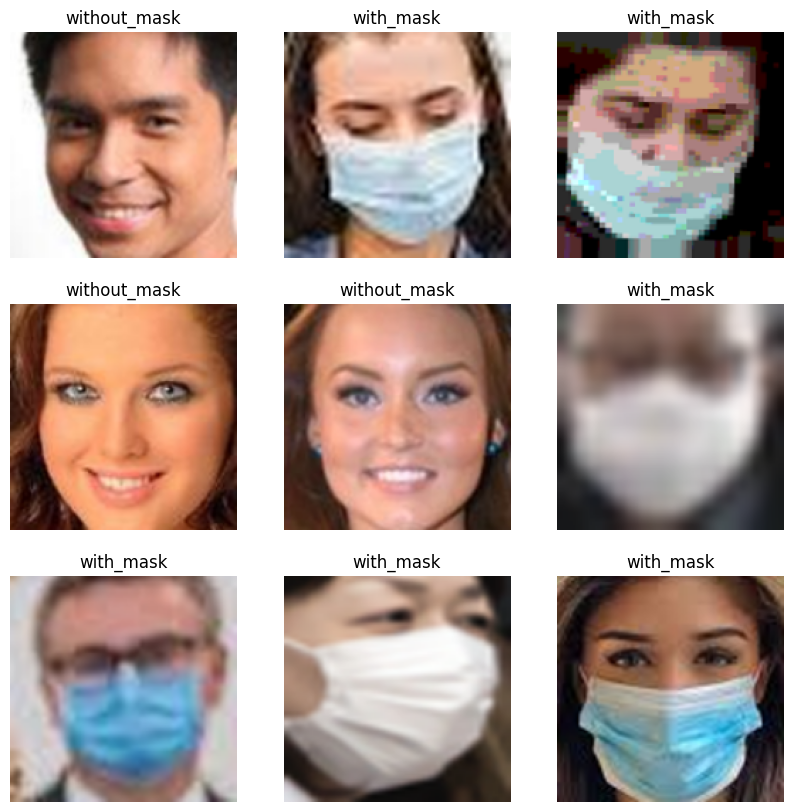

In [ ]:
class_names = train_dir.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dir.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Data augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

### Rescale image pixel values
- MobileNetV2 model: Expects pixel values in `[-1, 1]`
- Pixel values in the images are in `[0, 255]`.

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
# Initializing the pre-trained model
base = InceptionV3(include_top=False,
    weights="imagenet")

# We will use the pre-trained weights
for layer in base.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
# Designing our model
model = keras.Sequential([
    # Preprocessing
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    preprocessing.RandomContrast(0.5), # contrast change by up to 50%
    #preprocessing.Normalization()
    # Base
    base,
    # Head
    layers.Flatten(),
    #layers.Dense(6, activation='relu'),
    layers.Dense(3, activation='sigmoid'),
])

In [ ]:
# Compiling our model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

# saving the training details in history variable
history = model.fit(
    train_dir,
    validation_data = validation_dir,
    epochs=30
)

Epoch 1/30
225/225 [==============================] - 32s 78ms/step - loss: 21.3165 - accuracy: 0.7054 - val_loss: 9.4471 - val_accuracy: 0.8235
Epoch 2/30
225/225 [==============================] - 12s 53ms/step - loss: 18.7779 - accuracy: 0.7618 - val_loss: 26.5447 - val_accuracy: 0.7199
Epoch 3/30
225/225 [==============================] - 12s 53ms/step - loss: 12.1184 - accuracy: 0.8173 - val_loss: 24.1971 - val_accuracy: 0.7751
Epoch 4/30
225/225 [==============================] - 13s 55ms/step - loss: 18.0087 - accuracy: 0.8127 - val_loss: 12.9334 - val_accuracy: 0.8547
Epoch 5/30
225/225 [==============================] - 14s 60ms/step - loss: 10.6028 - accuracy: 0.8530 - val_loss: 15.6652 - val_accuracy: 0.7639
Epoch 6/30
225/225 [==============================] - 13s 54ms/step - loss: 8.7934 - accuracy: 0.8692 - val_loss: 19.2804 - val_accuracy: 0.7249
Epoch 7/30
225/225 [==============================] - 13s 55ms/step - loss: 10.9169 - accuracy: 0.8590 - val_loss: 33.8866 - v

In [ ]:
model.save_weights('output.h5')

<Axes: ylabel='loss'>

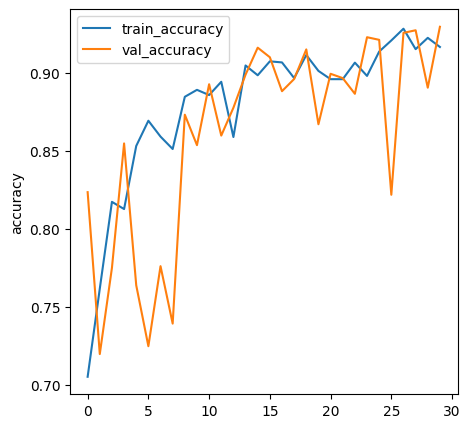

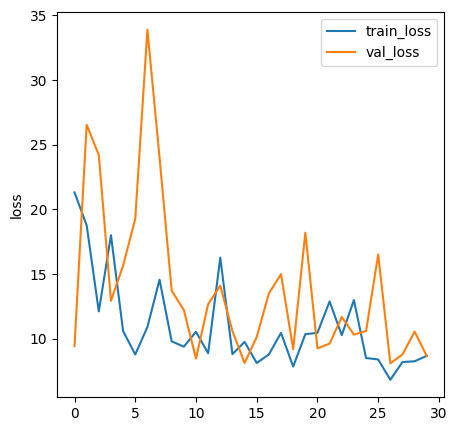

In [ ]:
# Saving the history data into a dataframe
df = pd.DataFrame(history.history)

# Visualizing the metrics of accuracy and loss

plt.figure(figsize=(5,5))
sns.lineplot(data = df.accuracy, label="train_accuracy")
sns.lineplot(data = df.val_accuracy, label="val_accuracy")

plt.figure(figsize=(5,5))
sns.lineplot(data = df.loss, label="train_loss")
sns.lineplot(data = df.val_loss, label="val_loss")

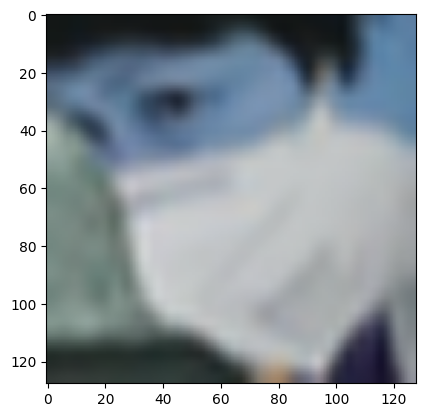

In [ ]:
im = cv2.imread('/content/Dataset/with_mask/2000.png')
plt.imshow(im)
plt.show();